In [1]:
# <notion - Plain text> - Descricao dos dados ROSSMAN 

# Imports 
#     helper functions
#     loading data
    
# Descricao dos dados
#     Rename columns
#     Data Dimensions
#     Data Types
#     Check NA - tres opcoes:
#         - 1. Excluo todas linhas com NA. rapido, porem joga dado fora
#         - 2. Algoritmos de ML para substituir por um dado 'inferido', por media, mediana, etc. Util quando nao se tem infos de negocio suficiente
#         - 3. Entendendo melhor o negocio e porque ha dados faltantes
#     Change Dtypes
#     Descriptive Statical - num_attributes, cat_attributes
#         Numerical atttributes
#             Central Tendency - mean, median
#             Dispersion - std, min, max, range, skew, kurtosis
#         Categorical attributes
#             *analise da distribuicao das categorias 
        

# Imports

In [1]:
import pandas as pd
import inflection
import math 
import seaborn as sns
from matplotlib import pyplot as plt


## Helper functions


In [41]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

In [42]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


NameError: name 'HTML' is not defined

## Loading data

In [2]:
df_sales_raw = pd.read_csv ('data/train.csv', low_memory = False)
df_store_raw = pd.read_csv ('data/store.csv', low_memory = False)

df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

In [3]:
df_raw.sample(20)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
319991,470,5,2014-10-03,0,0,0,1,a,0,a,c,50.0,NaN,NaN,0,NaN,NaN,NaN
506807,268,4,2014-04-03,5482,627,1,1,0,1,a,a,4520.0,2.0,2014.0,0,NaN,NaN,NaN
607166,277,5,2014-01-03,6226,586,1,0,0,1,d,c,7840.0,NaN,NaN,1,31.0,2009.0,"Feb,May,Aug,Nov"
34518,1069,3,2015-07-01,7920,989,1,1,0,0,a,c,18050.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
550292,268,7,2014-02-23,0,0,0,0,0,0,a,a,4520.0,2.0,2014.0,0,NaN,NaN,NaN
144634,800,2,2015-03-24,3350,376,1,0,0,0,d,a,2020.0,7.0,2014.0,0,NaN,NaN,NaN
223867,868,1,2015-01-12,11378,700,1,1,0,0,d,c,1360.0,8.0,2005.0,1,10.0,2014.0,"Jan,Apr,Jul,Oct"
493671,512,2,2014-04-15,6141,1327,1,1,0,1,b,b,590.0,NaN,NaN,1,5.0,2013.0,"Mar,Jun,Sept,Dec"
30664,560,6,2015-07-04,13112,1639,1,0,0,0,c,c,1910.0,7.0,2013.0,0,NaN,NaN,NaN
339228,1114,6,2014-09-13,21035,3440,1,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [4]:
df_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# DESCRICAO DOS DADOS

In [4]:
df1 = df_raw.copy()

## Rename Columns

In [5]:
cols_old = [ 'Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo','StateHoliday', 'SchoolHoliday', 
             'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
            'Promo2', 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore (x)

cols_new = map (snakecase, cols_old)

#rename
df1.columns = cols_new

In [ ]:
# <notion> 
# inflection.underscore () - metodo para passar de KamelCase para snak_case 

# cols_old = [ 'Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo','StateHoliday', 'SchoolHoliday', 
#              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
#             'Promo2', 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']

# snakecase = lambda x: inflection.underscore (x)

# cols_new = map (snakecase, cols_old)

# #rename
# df1.columns = cols_new

## Data Dimensions

In [7]:
print ('Number of Rows: {}'.format(df1.shape[0]))
print('Number of columns: {}'.format(df1.shape[1]))

Number of Rows: 1017209
Number of columns: 18


## Data Types

In [8]:
df1['date'] = pd.to_datetime( df1['date'] ) 
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## Check NA

In [9]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## Fillout NA

In [10]:
df1['competition_distance'].max()

75860.0

In [11]:
# competition_distance   
#     !presume-se: se a distancia é muito grande, nao ha competidor proximo. 
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000 if math.isnan(x) else x)


# competition_open_since_month    
#     !presume-se: se estiver na, e 'competition_distance' not null, considera-se a 'date', ja que nao faz sentido existir 
#         um competidor proximo que nao tenha inaugurado a loja ainda
df1['competition_open_since_month'] = df1.apply( lambda x: x['date'].month if math.isnan( x['competition_open_since_month'] ) else x['competition_open_since_month'], axis =1)


# competition_open_since_year
df1['competition_open_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['competition_open_since_year'] ) else x['competition_open_since_year'], axis =1)


# promo2_since_week
df1['promo2_since_week'] = df1.apply( lambda x: x['date'].year if math.isnan( x['competition_open_since_year'] ) else x['competition_open_since_year'], axis =1)

# promo2_since_year 
df1['promo2_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['competition_open_since_year'] ) else x['competition_open_since_year'], axis =1)

# promo_interval    
month_map = { 1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec' }

df1['promo_interval'].fillna(0, inplace = True )

df1['month_map'] = df1['date'].dt.month.map(month_map)

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)

In [12]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

In [ ]:
# <notion> 
# math.isnan () - metodo booleano para identificar os NA

# df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000 if math.isnan(x) else x)


## Change Dtypes

obs: após realizar alteracoes substanciais nos dados, é importante verificar os tipos

In [13]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [14]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype('int64')

df1['competition_open_since_year'] = df1['competition_open_since_year'].astype('int64')

df1['promo2_since_week'] = df1['promo2_since_week'].astype('int64')

df1['promo2_since_year'] = df1['promo2_since_year'].astype('int64')

## Descriptive Statical 

In [16]:
num_attributes = df1.select_dtypes ( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes ( exclude=['int64','float64'] )

### Numerical Attributes

In [17]:
# Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat ( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes','min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


<AxesSubplot:xlabel='competition_distance', ylabel='Count'>

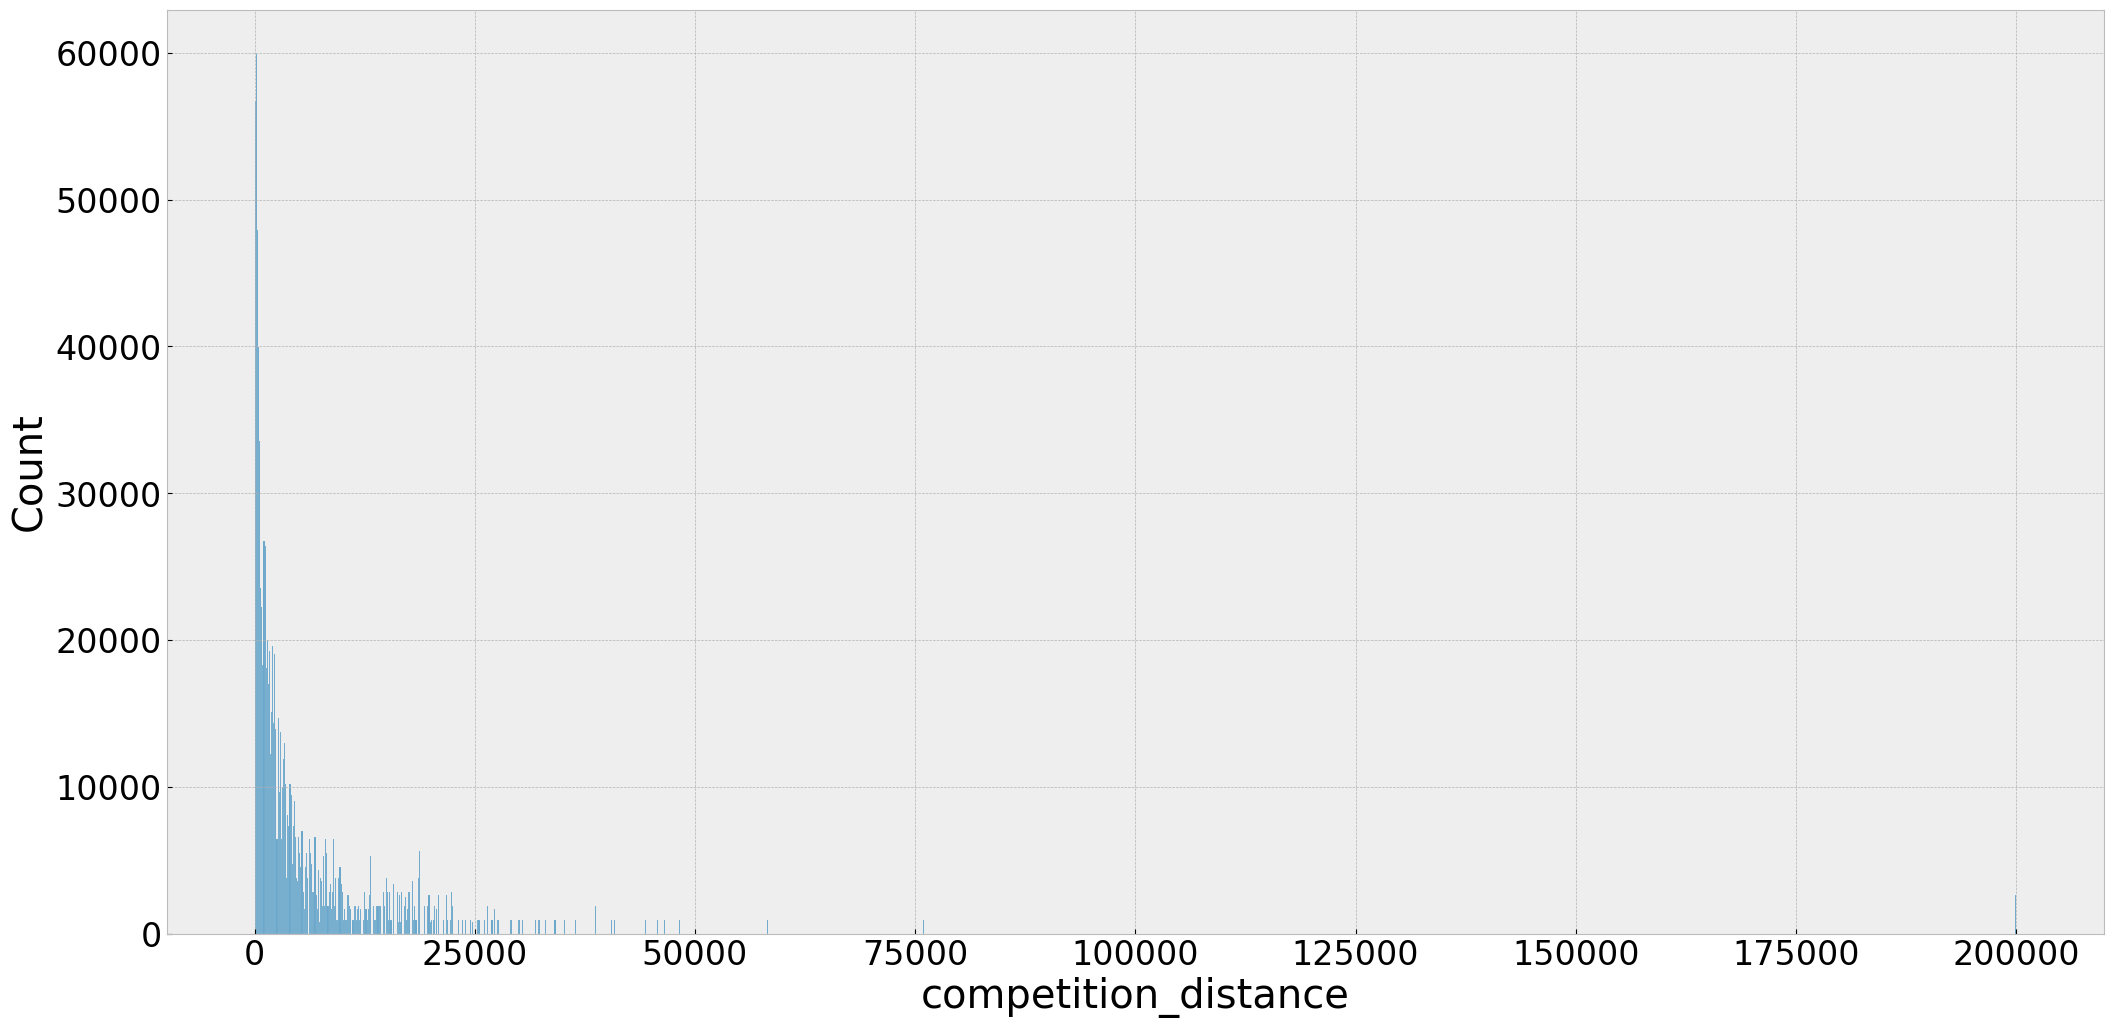

In [44]:
# plotando a coluna 'competition_distance' para estudar melhor o fenomeno visualmente
sns.histplot ( df1['competition_distance'] )

### Categorical Attributes

In [27]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

date              942
state_holiday       4
store_type          4
assortment          3
promo_interval      4
month_map          12
dtype: int64

<AxesSubplot:xlabel='state_holiday', ylabel='sales'>

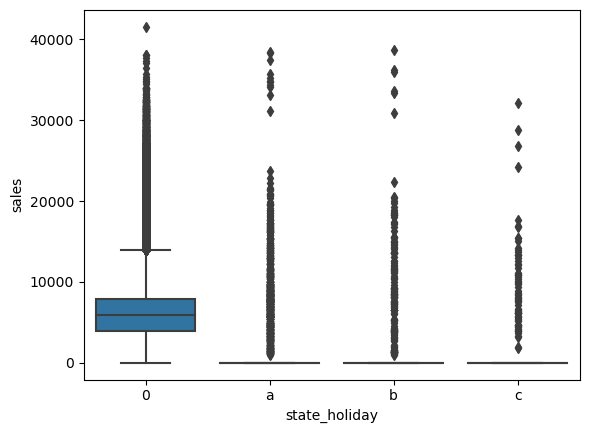

In [28]:
#aqui considerou-se os feriados, e tambem as vendas = 0, portanto o grafico trouxe todos pontos !=0 como outliers 
# sns.boxplot (x = 'state_holiday' , y = 'sales' , data = df1)

<AxesSubplot:xlabel='assortment', ylabel='sales'>

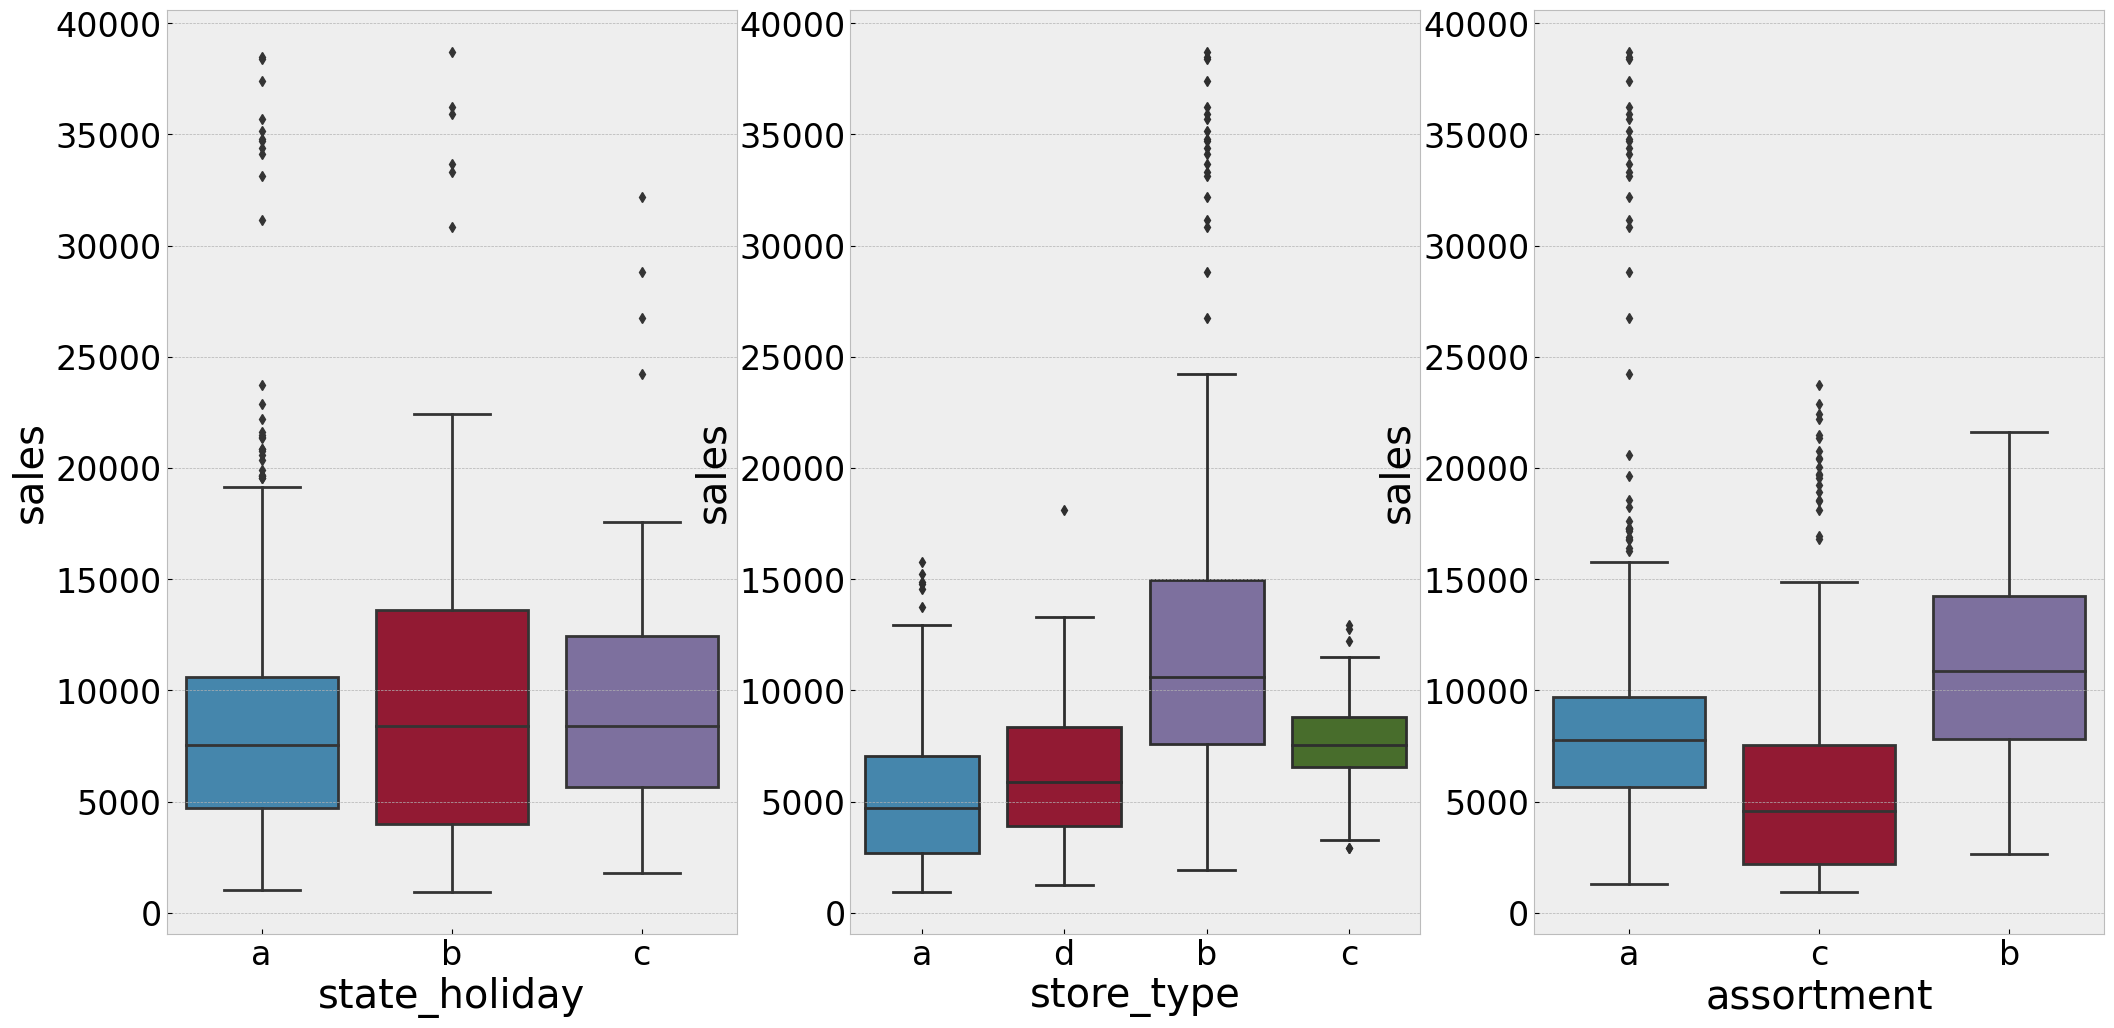

In [43]:
aux1 = df1[(df1['state_holiday'] != '0') & (df1['sales']>0)]

plt.subplot (1, 3, 1)
sns.boxplot (x = 'state_holiday' , y = 'sales' , data = aux1)

plt.subplot (1, 3, 2)
sns.boxplot (x = 'store_type' , y = 'sales' , data = aux1)

plt.subplot (1, 3, 3)
sns.boxplot (x = 'assortment' , y = 'sales' , data = aux1)